In [1]:
import numpy as np
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt

from bsg.fitting import models 
from matplotlib.gridspec import GridSpec
from bsg.plotting.utils import plot_TESS_stars, plot_periodogram_fit
from pythia.timeseries.lombscargle import LS_periodogram


In [2]:
def get_data(tic, tpf=False, save_lc=True):
    
    search = lk.search_lightcurve('TIC{}'.format(tic), author='SPOC', cadence=120)
    lc = search.download_all().stitch().remove_nans().remove_outliers().normalize()
    times = np.array(lc.time.value)
    flux = np.array(lc.flux.value)
    flux_err = np.array(lc.flux_err.value)
    
    if tpf:
        tpf = lk.search_targetpixelfile('TIC{}'.format(tic), author='SPOC', cadence=120)[0].download()
    else:
        tpf = None
    
    if save_lc:
        np.savetxt('{}tic{:s}_lc.dat'.format(datadir,tic), np.array([times, flux, flux_err]).T)

    return times, flux, flux_err, tpf

In [3]:
# LMC
tic = '287401176'
plotdir = './plots/'
datadir = './data/lmc/'

# times, flux, flux_err, tpf = get_data(tic)
times, flux, flux_err = np.loadtxt('tic{}_lc.dat'.format(tic)).T

12.607043523595728


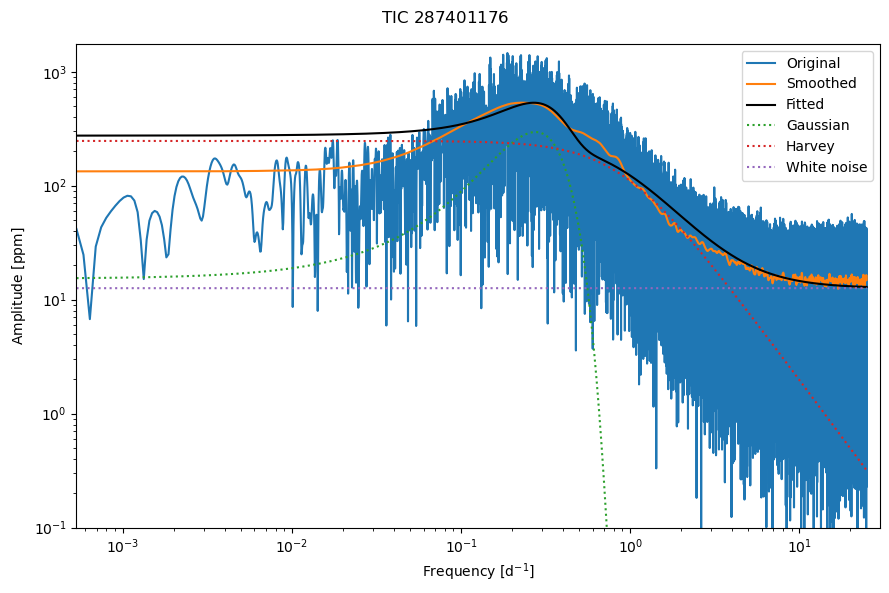

In [4]:
nu, psd, psd_smoothed, fit_parameters = models.fit_excess(tic, times, flux, )#normalization='psd')

fig, ax = plot_periodogram_fit(nu, psd, psd_smoothed, fit_parameters, savedir=plotdir, tic=tic)
plt.show()